### **Level-3 Task-1**
Task- **Restaurant Reviews**

*   Analyze the text reviews to identify the most
common positive and negative keywords.
*   Calculate the average length of reviews and
explore if there is a relationship between
review length and rating.



### **Loading Dataset**

In [ ]:
#Importing all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv(r"/content/Restaurant Dataset.csv")

In [ ]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

### **Analyze the text reviews to identify the most common positive and negative keywords.**

In [ ]:
# Rating count of the different Rating text:
review_data = df['Rating text'].value_counts()
review_data

Rating text
Average      3737
Not rated    2148
Good         2100
Very Good    1079
Excellent     301
Poor          186
Name: count, dtype: int64

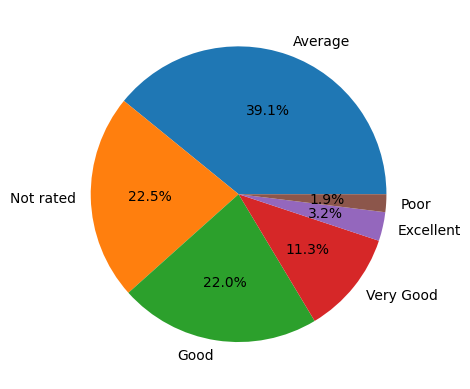

In [ ]:
plt.pie(review_data.values, labels= review_data.index, autopct = '%.1f%%', radius =1)
plt.show()

By seeing the above review_data

The most possitive Keyword counts: 301 (i.e, for Excellent)

The most negative keyword counts : 186 (i.e, for Poor)

### **Calculate the average length of reviews and explore if there is a relationship between review length and rating.**

In [ ]:
reviews = df['Rating text']
total_reviews =len(reviews)
total_review_length = 0

for review in reviews:
    total_review_length += len(review.split())

    avg_review_length = total_review_length / total_reviews
    print( "Average review length:" , round(avg_review_length,2))

In [ ]:
# Relationship between rating and review length
review_len_vs_rating = {}

for rating in df['Aggregate rating'].unique():
    filtered_review = df.loc[df['Aggregate rating'] == rating]['Rating text']
    total_length = 0
    total_reviews = len(filtered_review)

    for review in filtered_review :
         total_reviews += len(review.split())

    average_length = total_length / total_reviews
    review_len_vs_rating[rating] = average_length

    print("Rating v/s Average review length")
    print(review_len_vs_rating)

Rating v/s Average review length
{4.8: 0.0}
Rating v/s Average review length
{4.8: 0.0, 4.5: 0.0}
Rating v/s Average review length
{4.8: 0.0, 4.5: 0.0, 4.4: 0.0}
Rating v/s Average review length
{4.8: 0.0, 4.5: 0.0, 4.4: 0.0, 4.9: 0.0}
Rating v/s Average review length
{4.8: 0.0, 4.5: 0.0, 4.4: 0.0, 4.9: 0.0, 4.0: 0.0}
Rating v/s Average review length
{4.8: 0.0, 4.5: 0.0, 4.4: 0.0, 4.9: 0.0, 4.0: 0.0, 4.2: 0.0}
Rating v/s Average review length
{4.8: 0.0, 4.5: 0.0, 4.4: 0.0, 4.9: 0.0, 4.0: 0.0, 4.2: 0.0, 4.3: 0.0}
Rating v/s Average review length
{4.8: 0.0, 4.5: 0.0, 4.4: 0.0, 4.9: 0.0, 4.0: 0.0, 4.2: 0.0, 4.3: 0.0, 3.6: 0.0}
Rating v/s Average review length
{4.8: 0.0, 4.5: 0.0, 4.4: 0.0, 4.9: 0.0, 4.0: 0.0, 4.2: 0.0, 4.3: 0.0, 3.6: 0.0, 4.7: 0.0}
Rating v/s Average review length
{4.8: 0.0, 4.5: 0.0, 4.4: 0.0, 4.9: 0.0, 4.0: 0.0, 4.2: 0.0, 4.3: 0.0, 3.6: 0.0, 4.7: 0.0, 3.0: 0.0}
Rating v/s Average review length
{4.8: 0.0, 4.5: 0.0, 4.4: 0.0, 4.9: 0.0, 4.0: 0.0, 4.2: 0.0, 4.3: 0.0, 3.6: 0

In [ ]:
review_len_vs_rating = pd.DataFrame ({'rating': list(review_len_vs_rating.keys()), 'avg_review_length': list(review_len_vs_rating)})
review_len_vs_rating

,rating,avg_review_length
0,4.8,4.8
1,4.5,4.5
2,4.4,4.4
3,4.9,4.9
4,4.0,4.0
5,4.2,4.2
6,4.3,4.3
7,3.6,3.6
8,4.7,4.7
9,3.0,3.0


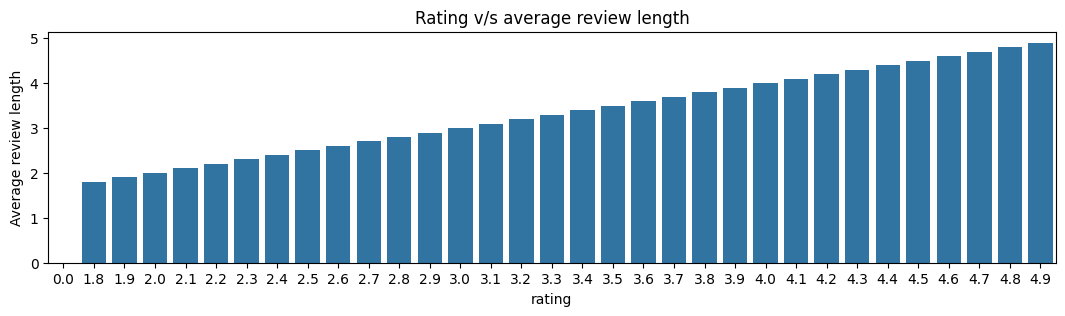

In [ ]:
plt.figure(figsize=(13,3))
sns.barplot(x = 'rating', y='avg_review_length', data = review_len_vs_rating)
plt.title('Rating v/s average review length')
plt.xlabel('rating')
plt.ylabel('Average review length')
plt.show()